In [1]:
import numpy as np
print(np.pi)
test=np.ones((2,))
print(test)
test=np.reshape(test,(2,1))
print(test)

3.141592653589793
[1. 1.]
[[1.]
 [1.]]


In [2]:
import matplotlib.pyplot as plt
x1=np.arange(0,5,1)
y1=np.arange(1,6,1)
plt.plot(x1,y1)
plt.show()

<Figure size 640x480 with 1 Axes>

In [3]:
import scipy as sc
import spacepy as sp
import chaosmagpy as cp

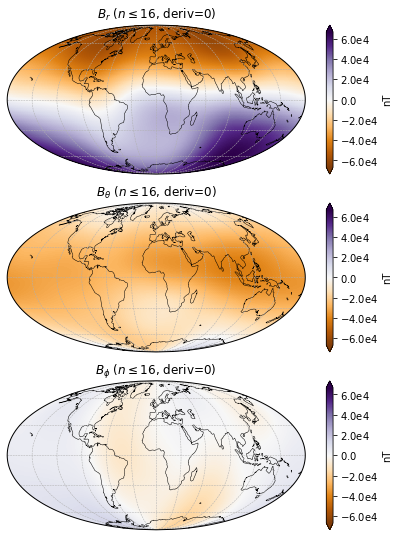

In [4]:
model = cp.load_CHAOS_matfile('CHAOS-6-x9.mat')

radius = 6371.2  # km, here core-mantle boundary
time = 0.0  # mjd2000, here Jan 1, 2000 0:00 UTC

model.plot_maps_tdep(time, radius, nmax=16, deriv=0)  # plots the SV up to degree 16

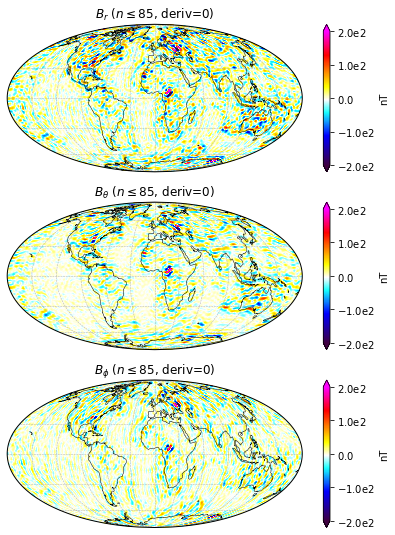

In [5]:
model.plot_maps_static(radius=6371.2, nmax=85)

(1440, 288)
[6805.         6805.00069493 6805.00138985 ... 6805.99861015 6805.99930507
 6806.        ]


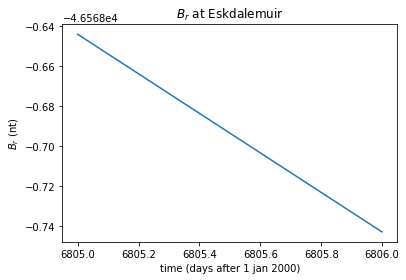

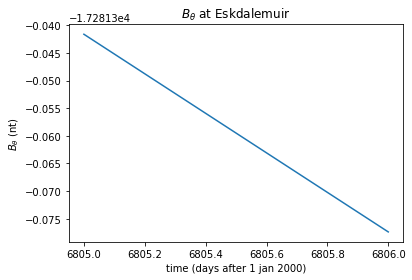

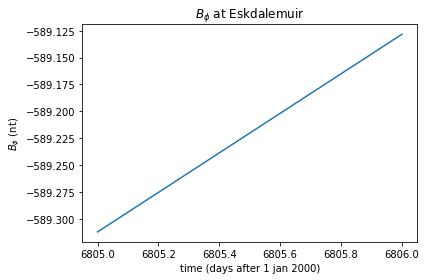

In [6]:
from chaosmagpy.model_utils import synth_values
from chaosmagpy.data_utils import mjd2000
from chaosmagpy.plot_utils import plot_timeseries

# set up
N = 60*24 #minutes per day
time = np.linspace(mjd2000(2018,8,19), mjd2000(2018,8,20), num=N)
radius = 6371.2
theta = 90.-55.300 #90 degrees minus latitude
phi = 356.800 #longitude
station='Eskdalemuir'

# calculate values
coeffs = model.synth_coeffs_tdep(time, nmax=16, deriv=0)
B_radius, B_theta, B_phi = synth_values(coeffs, radius, theta, phi)
print(coeffs.shape)
print(time)

# plot data
plt.ion()
fig1=plt.figure()
ax1=fig1.add_subplot(111)
ax1.set_title('$B_r$ at ' + station)
ax1.set_xlabel('time (days after 1 jan 2000)')
ax1.set_ylabel('$B_r$ (nt)')
ax1.plot(time,B_radius)

fig2=plt.figure()
ax2=fig2.add_subplot(111)
ax2.set_title('$B_\\theta$ at ' + station)
ax2.set_xlabel('time (days after 1 jan 2000)')
ax2.set_ylabel('$B_\\theta$ (nt)')
ax2.plot(time,B_theta)

fig3=plt.figure()
ax3=fig3.add_subplot(111)
ax3.set_title('$B_\\phi$ at ' + station)
ax3.set_xlabel('time (days after 1 jan 2000)')
ax3.set_ylabel('$B_\\phi$ (nt)')
ax3.plot(time,B_phi)
plt.show()

In [15]:
from chaosmagpy.model_utils import synth_values #now static values
from chaosmagpy.data_utils import mjd2000
from chaosmagpy.plot_utils import plot_timeseries

# set up
N = 60*24 #minutes per day
radius = 6371.2
theta = 90.-55.300 #90 degrees minus latitude
phi = 356.800 #longitude
station='Eskdalemuir'

# calculate values
coeffstat = model.synth_coeffs_static()
Bstat_radius, Bstat_theta, Bstat_phi = synth_values(coeffs, radius, theta, phi)
print(Bstat_radius, Bstat_theta, Bstat_phi)

36.118541640325255 -12.20125582888961 8.96808599020452


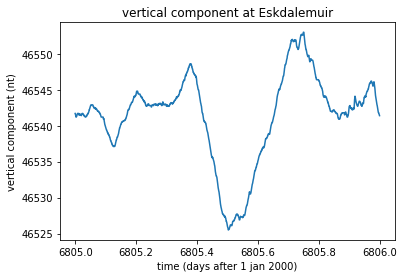

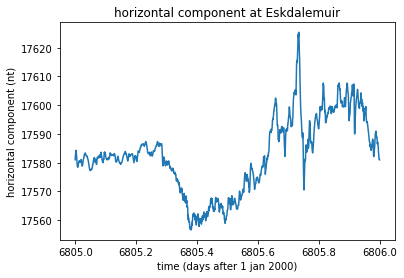

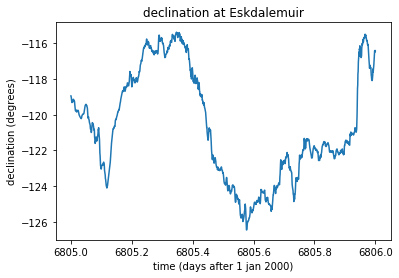

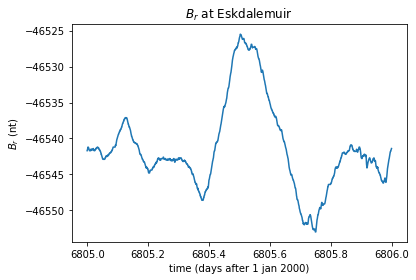

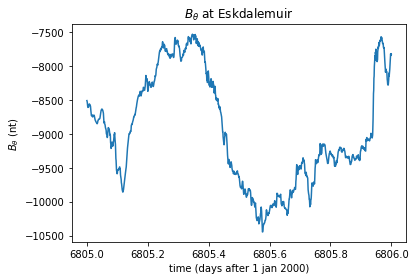

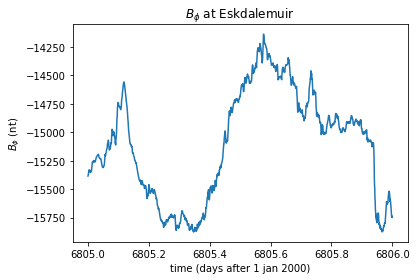

In [17]:
# reading data into three separate lists
Eskd=open('magnetic_data/esk20180819qmin.min','r')
counter=0
Hor=[]
Decl=[]
Vert=[]
X=[]
Y=[]
for line in Eskd:
    counter+=1
    if counter>22: #read after line 22
        words=line.split()
        Hor.append(float(words[3]))
        Decl.append(float(words[4]))
        Vert.append(float(words[5]))
Eskd.close()
# Plot unaltered data
fig1=plt.figure()
ax1=fig1.add_subplot(111)
ax1.set_title('vertical component at ' + station)
ax1.set_xlabel('time (days after 1 jan 2000)')
ax1.set_ylabel('vertical component (nt)')
ax1.plot(time,Vert)

fig2=plt.figure()
ax2=fig2.add_subplot(111)
ax2.set_title('horizontal component at ' + station)
ax2.set_xlabel('time (days after 1 jan 2000)')
ax2.set_ylabel('horizontal component (nt)')
ax2.plot(time,Hor)

fig3=plt.figure()
ax3=fig3.add_subplot(111)
ax3.set_title('declination at ' + station)
ax3.set_xlabel('time (days after 1 jan 2000)')
ax3.set_ylabel('declination (degrees)')
ax3.plot(time,Decl)
plt.show()

# Transform HDZ to XYZ
for item in range(len(Decl)):
    X.append(Hor[item]*np.cos(Decl[item]*np.pi/180.)) #minus is added to immediately transform to polar coordinates
    Y.append(Hor[item]*np.sin(Decl[item]*np.pi/180.))
Z=np.multiply(-1,Vert)


# plot data
plt.ion()
fig1=plt.figure()
ax1=fig1.add_subplot(111)
ax1.set_title('$B_r$ at ' + station)
ax1.set_xlabel('time (days after 1 jan 2000)')
ax1.set_ylabel('$B_r$ (nt)')
ax1.plot(time,Z)

fig2=plt.figure()
ax2=fig2.add_subplot(111)
ax2.set_title('$B_\\theta$ at ' + station)
ax2.set_xlabel('time (days after 1 jan 2000)')
ax2.set_ylabel('$B_\\theta$ (nt)')
ax2.plot(time,X)

fig3=plt.figure()
ax3=fig3.add_subplot(111)
ax3.set_title('$B_\\phi$ at ' + station)
ax3.set_xlabel('time (days after 1 jan 2000)')
ax3.set_ylabel('$B_\\phi$ (nt)')
ax3.plot(time,Y)
plt.show()

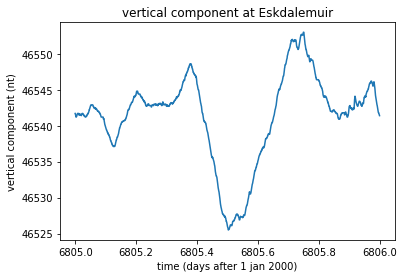

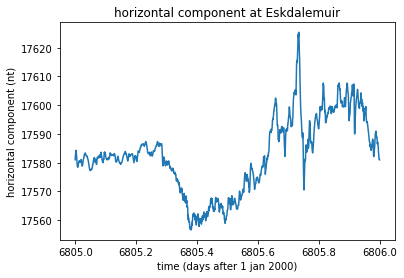

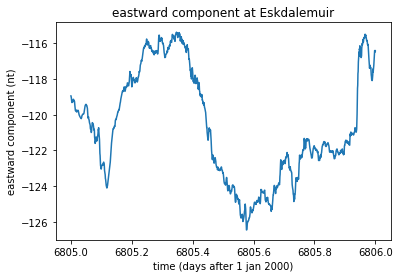

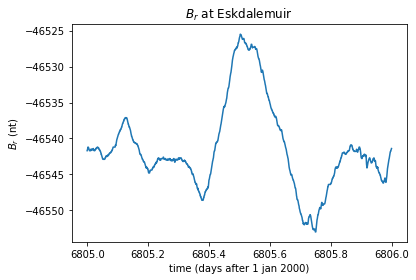

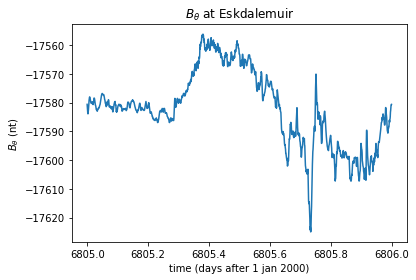

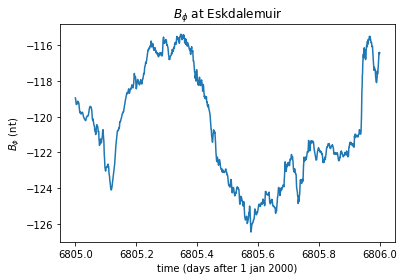

In [18]:
# reading data into three separate lists, take two
Eskd=open('magnetic_data/esk20180819qmin.min','r')
counter=0
Hor=[]
Decl=[]
Vert=[]
X=[]
for line in Eskd:
    counter+=1
    if counter>22: #read after line 22
        words=line.split()
        Hor.append(float(words[3]))
        Decl.append(float(words[4]))
        Vert.append(float(words[5]))
Eskd.close()

# Plot unaltered data
fig1=plt.figure()
ax1=fig1.add_subplot(111)
ax1.set_title('vertical component at ' + station)
ax1.set_xlabel('time (days after 1 jan 2000)')
ax1.set_ylabel('vertical component (nt)')
ax1.plot(time,Vert)

fig2=plt.figure()
ax2=fig2.add_subplot(111)
ax2.set_title('horizontal component at ' + station)
ax2.set_xlabel('time (days after 1 jan 2000)')
ax2.set_ylabel('horizontal component (nt)')
ax2.plot(time,Hor)

fig3=plt.figure()
ax3=fig3.add_subplot(111)
ax3.set_title('eastward component at ' + station)
ax3.set_xlabel('time (days after 1 jan 2000)')
ax3.set_ylabel('eastward component (nt)')
ax3.plot(time,Decl)
plt.show()

# Transform HDZ to XYZ
for item in range(len(Decl)):
    X.append(-np.sqrt(Hor[item]**2-Decl[item]**2)) #minus is added to immediately transform to polar coordinates
Y=Decl
Z=np.multiply(-1,Vert)


# plot data
plt.ion()
fig1=plt.figure()
ax1=fig1.add_subplot(111)
ax1.set_title('$B_r$ at ' + station)
ax1.set_xlabel('time (days after 1 jan 2000)')
ax1.set_ylabel('$B_r$ (nt)')
ax1.plot(time,Z)

fig2=plt.figure()
ax2=fig2.add_subplot(111)
ax2.set_title('$B_\\theta$ at ' + station)
ax2.set_xlabel('time (days after 1 jan 2000)')
ax2.set_ylabel('$B_\\theta$ (nt)')
ax2.plot(time,X)

fig3=plt.figure()
ax3=fig3.add_subplot(111)
ax3.set_title('$B_\\phi$ at ' + station)
ax3.set_xlabel('time (days after 1 jan 2000)')
ax3.set_ylabel('$B_\\phi$ (nt)')
ax3.plot(time,Y)
plt.show()

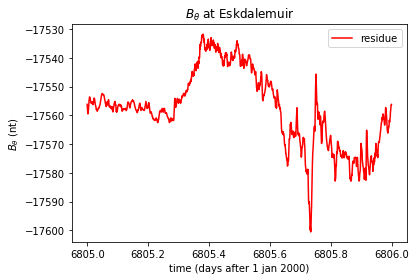

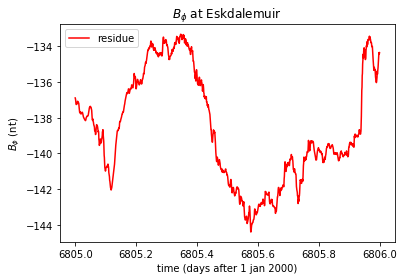

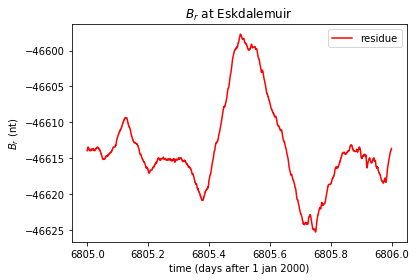

In [21]:
# subtract the two data sets!
SpaceX=X-B_theta-Bstat_theta
SpaceY=Y-B_phi-Bstat_phi
SpaceZ=Z-B_radius-Bstat_radius

figx=plt.figure()
ax1=figx.add_subplot()
ax1.set_title('$B_\\theta$ at ' + station)
ax1.set_xlabel('time (days after 1 jan 2000)')
ax1.set_ylabel('$B_\\theta$ (nt)')
#ax1.plot(time,X,label='total',color='blue')
#ax1.plot(time,B_theta,label='model',color='green')
ax1.plot(time,SpaceX,label='residue',color='red')
ax1.legend()

figy=plt.figure()
ax2=figy.add_subplot()
ax2.set_title('$B_\\phi$ at ' + station)
ax2.set_xlabel('time (days after 1 jan 2000)')
ax2.set_ylabel('$B_\\phi$ (nt)')
#ax2.plot(time,Y,label='total',color='blue')
#ax2.plot(time,B_phi,label='model',color='green')
ax2.plot(time,SpaceY,label='residue',color='red')
ax2.legend()

figz=plt.figure()
ax3=figz.add_subplot()
ax3.set_title('$B_r$ at ' + station)
ax3.set_xlabel('time (days after 1 jan 2000)')
ax3.set_ylabel('$B_r$ (nt)')
#ax3.plot(time,Z,label='total',color='blue')
#ax3.plot(time,B_radius,label='model',color='green')
ax3.plot(time,SpaceZ,label='residue',color='red')
ax3.legend()
plt.show()

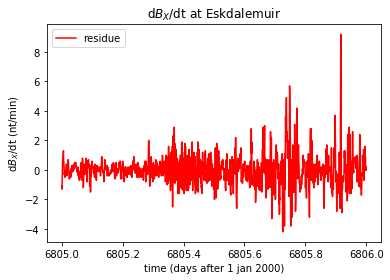

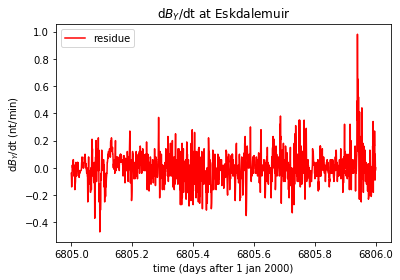

In [22]:
# try to get time derivative and frequency at which this happens, only horizontal components matter
dXdt=np.zeros(len(SpaceX)) # define length array
dYdt=np.zeros(len(SpaceY))

for item in range(len(SpaceX)-1): # obtain derivative
    dXdt[item]=SpaceX[item+1]-SpaceX[item]
    dYdt[item]=SpaceY[item+1]-SpaceY[item]

figx=plt.figure()
ax1=figx.add_subplot()
ax1.set_title('d$B_X$/dt at ' + station)
ax1.set_xlabel('time (days after 1 jan 2000)')
ax1.set_ylabel('d$B_X$/dt (nt/min)')
ax1.plot(time,dXdt,label='residue',color='red')
ax1.legend()

figy=plt.figure()
ax2=figy.add_subplot()
ax2.set_title('d$B_Y$/dt at ' + station)
ax2.set_xlabel('time (days after 1 jan 2000)')
ax2.set_ylabel('d$B_Y$/dt (nt/min)')
ax2.plot(time,dYdt,label='residue',color='red')
ax2.legend()
plt.show()

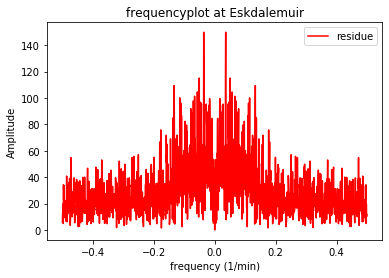

In [23]:
# get frequencyplot
FdXshift=np.fft.fft(dXdt) # get frequency component
FdX=np.abs(np.fft.fftshift(FdXshift)) # shift it to the middle of the plot
FXshift=np.fft.fft(SpaceX) # get frequency component
FX=np.abs(np.fft.fftshift(FXshift)) # shift it to the middle of the plot

Nu_c=1./(2*1.) # Nyquist frequency in 1/minutes
df=1./(60*24)
freq=np.arange(-Nu_c,Nu_c,df)
# freq=np.fft.fftfreq(len(dXdt),60)
figfx=plt.figure()
ax1=figfx.add_subplot()
ax1.set_title('frequencyplot at ' + station)
ax1.set_xlabel('frequency (1/min)')
ax1.set_ylabel('Amplitude')
ax1.plot(freq,FdX,label='residue',color='red')
ax1.legend()
plt.show()

In [14]:
def plotspace(filename,datastart,types):
    # import basic packages and earth magnetic model
    import numpy as np
    import pandas as pd
    import matplotlib
    matplotlib.use('nbagg')
    import matplotlib.pyplot as plt
    import re
    import chaosmagpy as cp
    from chaosmagpy.model_utils import synth_values
    from chaosmagpy.data_utils import mjd2000
    from chaosmagpy.plot_utils import plot_timeseries
    model = cp.load_CHAOS_matfile('CHAOS-6-x9.mat')
    possible_characters = ('-', ' ')
    path='/usr/people/out/Documents/Magnetic_field/'
    
##### calculate values from observation station #####
    # read-in file of station
    File=open(f'{path}{filename}','r') # open file
    counter=0
    HorX=[] # make some lists
    DeclY=[]
    VertZ=[]
    X=[]
    for line in File:
        if counter==2:
            words=line.split()
            station=words[2]
        if counter==4:
            words=line.split()
            lat=float(words[2]) # latitude station
        if counter==5:
            words=line.split()
            phi=float(words[2]) # longitude station
        if counter>=datastart-1: #read when the data starts
            if counter==datastart-1:
                dates=re.split("[%s]" % ("".join(possible_characters)), line) # get start date
                
            words=line.split()
            HorX.append(float(words[3])) # get horizontal or X-component
            DeclY.append(float(words[4])) # get 'declination' or Y-component
            VertZ.append(float(words[5])) # get vertical component or Z-component
        counter+=1
    File.close()

    if types==0: #if given in HDZ, types==0
        for item in range(len(DeclY)):
            X.append(-np.sqrt(HorX[item]**2-DeclY[item]**2)) #minus is added to immediately transform to polar coordinates
        Y=DeclY
        Z=np.multiply(-1,VertZ)
    if types==1: #if given in XYZ, types==1
        X=np.multiply(-1,HorX)
        Y=DeclY
        Z=np.multiply(-1,VertZ)
##### calculate model value of magnetic field #####
    # set up
    N = 60*24 #minutes per day
    time = np.linspace(mjd2000(int(dates[0]),int(dates[1]),int(dates[2])), 
                               mjd2000(int(dates[0]),int(dates[1]),int(dates[2])+1), num=N)
    radius = 6371.2
    theta = 90.-lat #90 degrees minus latitude

    # calculate values for temporal and static field
    coeffs = model.synth_coeffs_tdep(time, nmax=16, deriv=0)
    B_radius, B_theta, B_phi = synth_values(coeffs, radius, theta, phi)
    coeffstat = model.synth_coeffs_static()
    Bstat_radius, Bstat_theta, Bstat_phi = synth_values(coeffstat, radius, theta, phi)
        
##### subtract the two data sets! #####
    SpaceX=X-B_theta-Bstat_theta
    SpaceY=Y-B_phi-Bstat_phi
    SpaceZ=Z-B_radius-Bstat_radius
        
##### plot data #####
    figx=plt.figure(figsize=(20,10))
    ax1=figx.add_subplot(311)
    ax11=figx.add_subplot(312)
    ax12=figx.add_subplot(313)
    ax1.set_title('$B_\\theta$ at '+ station + ' on ' + dates[0] + '-' + dates[1] + '-' + dates[2])
    ax12.set_xlabel('time (days after 1 jan 2000)')
    ax11.set_ylabel('$B_\\theta$ (nt)')
    ax11.plot(time,X,label='observed',color='blue')
    ax12.plot(time,B_theta+Bstat_theta,label='model',color='green')
    ax1.plot(time,SpaceX,label='residue',color='red')
    ax1.legend()
    ax11.legend()
    ax12.legend()

    figy=plt.figure(figsize=(20,10))
    ax2=figy.add_subplot(311)
    ax21=figy.add_subplot(312)
    ax22=figy.add_subplot(313)
    ax2.set_title('$B_\\phi$ at '+ station + ' on ' + dates[0] + '-' + dates[1] + '-' + dates[2])
    ax22.set_xlabel('time (days after 1 jan 2000)')
    ax21.set_ylabel('$B_\\phi$ (nt)')
    ax21.plot(time,Y,label='total',color='blue')
    ax22.plot(time,B_phi+Bstat_phi,label='model',color='green')
    ax2.plot(time,SpaceY,label='residue',color='red')
    ax2.legend()
    ax21.legend()
    ax22.legend()

    figz=plt.figure(figsize=(20,10))
    ax3=figz.add_subplot(311)
    ax31=figz.add_subplot(312)
    ax32=figz.add_subplot(313)
    ax3.set_title('$B_r$ at '+ station + ' on ' + dates[0] + '-' + dates[1] + '-' + dates[2])
    ax32.set_xlabel('time (days after 1 jan 2000)')
    ax31.set_ylabel('$B_r$ (nt)')
    ax31.plot(time,Z,label='total',color='blue')
    ax32.plot(time,B_radius+Bstat_radius,label='model',color='green')
    ax3.plot(time,SpaceZ,label='residue',color='red')
    ax3.legend()
    ax31.legend()
    ax32.legend()
    plt.show()
    
    figall=plt.figure(figsize=(20,10))
    ax4=figall.add_subplot(311)
    ax41=figall.add_subplot(312)
    ax42=figall.add_subplot(313)
    ax4.set_title('Radial component')
    ax41.set_title('Longitudinal component')
    ax41.set_ylabel('nanoteslas')
    ax42.set_title('Latitudional component')
    ax4.plot(time,SpaceZ,color='red')
    ax41.plot(time,SpaceY,color='red')
    ax42.plot(time,SpaceX,color='red')
    plt.savefig(f'{path}station_results/{station} at {dates[0]}-{dates[1]}-{dates[2]}.png')
    
##### calculate frequency spectrum #####
    # try to get time derivative and frequency at which this happens, only horizontal components matter
    dXdt=np.zeros(len(SpaceX)) # define length array
    dYdt=np.zeros(len(SpaceY))

    for item in range(len(SpaceX)-1): # obtain derivative
        dXdt[item]=SpaceX[item+1]-SpaceX[item]
        dYdt[item]=SpaceY[item+1]-SpaceY[item]

    figx=plt.figure()
    ax1=figx.add_subplot()
    ax1.set_title('d$B_X$/dt at ' + station)
    ax1.set_xlabel('time (days after 1 jan 2000)')
    ax1.set_ylabel('d$B_X$/dt (nt/min)')
    ax1.plot(time,dXdt,label='residue',color='red')
    ax1.legend()

    figy=plt.figure()
    ax2=figy.add_subplot()
    ax2.set_title('d$B_Y$/dt at ' + station)
    ax2.set_xlabel('time (days after 1 jan 2000)')
    ax2.set_ylabel('d$B_Y$/dt (nt/min)')
    ax2.plot(time,dYdt,label='residue',color='red')
    ax2.legend()
    plt.show()
    
    # get frequencyplot
    FdXshift=np.fft.fft(dXdt) # get frequency component
    FdX=np.abs(np.fft.fftshift(FdXshift)) # shift it to the middle of the plot
    FdYshift=np.fft.fft(dYdt) # get frequency component
    FdY=np.abs(np.fft.fftshift(FdYshift)) # shift it to the middle of the plot
    
    Nu_c=1./(2*1.) # Nyquist frequency in 1/minutes
    df=1./(60*24) #frequencystepping
    freq=np.arange(-Nu_c,Nu_c,df)
    # freq=np.fft.fftfreq(len(dXdt),60)
    figfx=plt.figure()
    ax1=figfx.add_subplot()
    ax1.set_title('frequencyplot at ' + station)
    ax1.set_xlabel('frequency X (1/min)')
    ax1.set_ylabel('Amplitude')
    ax1.plot(freq,FdX,label='residue',color='red')
    ax1.legend()
    figfy=plt.figure()
    ax1=figfy.add_subplot()
    ax1.set_title('frequencyplot at ' + station)
    ax1.set_xlabel('frequency Y (1/min)')
    ax1.set_ylabel('Amplitude')
    ax1.plot(freq,FdY,label='residue',color='red')
    ax1.legend()
    plt.show()
    
                    
##### save files #####
    newfile=pd.DataFrame(columns=['B_theta (nt)','B_phi (nt)','B_r (nt)','dBx/dt','dBy/dt'])
    for i in range(N):
        newfile.loc[i]=SpaceX[i], SpaceY[i], SpaceZ[i], dXdt[i], dYdt[i]
    newfile.to_csv(path_or_buf=f'{path}station_results/{station} at {dates[0]}-{dates[1]}-{dates[2]}.csv', sep=';', index=False, header=True)

In [34]:
def testplotspace(filename1,filename2,datastart,types):
    # import basic packages and earth magnetic model
    import numpy as np
    import pandas as pd
    import matplotlib
    matplotlib.use('nbagg')
    import matplotlib.pyplot as plt
    import re
    import chaosmagpy as cp
    from chaosmagpy.model_utils import synth_values
    from chaosmagpy.data_utils import mjd2000
    from chaosmagpy.plot_utils import plot_timeseries
    model = cp.load_CHAOS_matfile('CHAOS-6-x9.mat')
    possible_characters = ('-', ' ')
    path='/usr/people/out/Documents/Magnetic_field/'
    
##### calculate values from observation station #####
    # read-in file of station
    File=open(f'{path}{filename1}','r') # open file
    counter=0
    HorX=[] # make some lists
    DeclY=[]
    VertZ=[]
    X1=[]
    for line in File:
        if counter==2:
            words=line.split()
            station=words[2]
        if counter==4:
            words=line.split()
            lat=float(words[2]) # latitude station
        if counter==5:
            words=line.split()
            phi=float(words[2]) # longitude station
        if counter>=datastart-1: #read when the data starts
            if counter==datastart-1:
                dates=re.split("[%s]" % ("".join(possible_characters)), line) # get start date
                
            words=line.split()
            HorX.append(float(words[3])) # get horizontal or X-component
            DeclY.append(float(words[4])) # get 'declination' or Y-component
            VertZ.append(float(words[5])) # get vertical component or Z-component
        counter+=1
    File.close()

    if types==0: #if given in HDZ, types==0
        for item in range(len(DeclY)):
            X1.append(np.sqrt(HorX[item]**2-DeclY[item]**2)) #minus is added to immediately transform to polar coordinates
        Y1=DeclY
        Z1=VertZ
    if types==1: #if given in XYZ, types==1
        X1=HorX
        Y1=DeclY
        Z1=VertZ
        
    # read-in file of station
    File=open(f'{path}{filename2}','r') # open file
    counter=0
    HorX=[] # make some lists
    DeclY=[]
    VertZ=[]
    X2=[]
    for line in File:
        if counter==2:
            words=line.split()
            station=words[2]
        if counter==4:
            words=line.split()
            lat=float(words[2]) # latitude station
        if counter==5:
            words=line.split()
            phi=float(words[2]) # longitude station
        if counter>=datastart-1: #read when the data starts
            if counter==datastart-1:
                dates=re.split("[%s]" % ("".join(possible_characters)), line) # get start date
                
            words=line.split()
            HorX.append(float(words[3])) # get horizontal or X-component
            DeclY.append(float(words[4])) # get 'declination' or Y-component
            VertZ.append(float(words[5])) # get vertical component or Z-component
        counter+=1
    File.close()

    if types==0: #if given in HDZ, types==0
        for item in range(len(DeclY)):
            X2.append(np.sqrt(HorX[item]**2-DeclY[item]**2)) #minus is added to immediately transform to polar coordinates
        Y2=DeclY
        Z2=VertZ
    if types==1: #if given in XYZ, types==1
        X2=HorX
        Y2=DeclY
        Z2=VertZ
##### calculate model value of magnetic field #####
    # set up
    N = 60*24 #minutes per day
    time = np.linspace(mjd2000(int(dates[0]),int(dates[1]),int(dates[2])), 
                               mjd2000(int(dates[0]),int(dates[1]),int(dates[2])+1), num=N)
##### subtract the two data sets! #####
    SpaceX=np.subtract(X1,X2)
    SpaceY=np.subtract(Y1,Y2)
    SpaceZ=np.subtract(Z1,Z2)
        
##### plot data #####
    figx=plt.figure(figsize=(20,10))
    ax1=figx.add_subplot(311)
    ax11=figx.add_subplot(312)
    ax12=figx.add_subplot(313)
    ax1.set_title('$B_\\theta$ at '+ station + ' on ' + dates[0] + '-' + dates[1] + '-' + dates[2])
    ax12.set_xlabel('time (days after 1 jan 2000)')
    ax11.set_ylabel('$B_\\theta$ (nt)')
    ax11.plot(time,X1,label='observed',color='blue')
    ax12.plot(time,X2,label='model',color='green')
    ax1.plot(time,SpaceX,label='residue',color='red')
    ax1.legend()
    ax11.legend()
    ax12.legend()

    figy=plt.figure(figsize=(20,10))
    ax2=figy.add_subplot(311)
    ax21=figy.add_subplot(312)
    ax22=figy.add_subplot(313)
    ax2.set_title('$B_\\phi$ at '+ station + ' on ' + dates[0] + '-' + dates[1] + '-' + dates[2])
    ax22.set_xlabel('time (days after 1 jan 2000)')
    ax21.set_ylabel('$B_\\phi$ (nt)')
    ax21.plot(time,Y1,label='total',color='blue')
    ax22.plot(time,Y2,label='model',color='green')
    ax2.plot(time,SpaceY,label='residue',color='red')
    ax2.legend()
    ax21.legend()
    ax22.legend()

    figz=plt.figure(figsize=(20,10))
    ax3=figz.add_subplot(311)
    ax31=figz.add_subplot(312)
    ax32=figz.add_subplot(313)
    ax3.set_title('$B_r$ at '+ station + ' on ' + dates[0] + '-' + dates[1] + '-' + dates[2])
    ax32.set_xlabel('time (days after 1 jan 2000)')
    ax31.set_ylabel('$B_r$ (nt)')
    ax31.plot(time,Z1,label='total',color='blue')
    ax32.plot(time,Z2,label='model',color='green')
    ax3.plot(time,SpaceZ,label='residue',color='red')
    ax3.legend()
    ax31.legend()
    ax32.legend()
    plt.show()
    
    figall=plt.figure(figsize=(20,10))
    ax4=figall.add_subplot(311)
    ax41=figall.add_subplot(312)
    ax42=figall.add_subplot(313)
    ax4.set_title('Radial component')
    ax41.set_title('Longitudinal component')
    ax41.set_ylabel('nanoteslas')
    ax42.set_title('Latitudional component')
    ax4.plot(time,SpaceZ,color='red')
    ax41.plot(time,SpaceY,color='red')
    ax42.plot(time,SpaceX,color='red')
#     plt.savefig(f'{path}station_results/{station} at {dates[0]}-{dates[1]}-{dates[2]}.png')
    
##### calculate frequency spectrum #####
    # try to get time derivative and frequency at which this happens, only horizontal components matter
    dXdt=np.zeros(len(SpaceX)) # define length array
    dYdt=np.zeros(len(SpaceY))

    for item in range(len(SpaceX)-1): # obtain derivative
        dXdt[item]=SpaceX[item+1]-SpaceX[item]
        dYdt[item]=SpaceY[item+1]-SpaceY[item]

    figx=plt.figure()
    ax1=figx.add_subplot()
    ax1.set_title('d$B_X$/dt at ' + station)
    ax1.set_xlabel('time (days after 1 jan 2000)')
    ax1.set_ylabel('d$B_X$/dt (nt/min)')
    ax1.plot(time,dXdt,label='residue',color='red')
    ax1.legend()

    figy=plt.figure()
    ax2=figy.add_subplot()
    ax2.set_title('d$B_Y$/dt at ' + station)
    ax2.set_xlabel('time (days after 1 jan 2000)')
    ax2.set_ylabel('d$B_Y$/dt (nt/min)')
    ax2.plot(time,dYdt,label='residue',color='red')
    ax2.legend()
    plt.show()
    
    # get frequencyplot
    FdXshift=np.fft.fft(dXdt) # get frequency component
    FdX=np.abs(np.fft.fftshift(FdXshift)) # shift it to the middle of the plot
    FdYshift=np.fft.fft(dYdt) # get frequency component
    FdY=np.abs(np.fft.fftshift(FdYshift)) # shift it to the middle of the plot
    
    Nu_c=1./(2*1.) # Nyquist frequency in 1/minutes
    df=1./(60*24) #frequencystepping
    freq=np.arange(-Nu_c,Nu_c,df)
    # freq=np.fft.fftfreq(len(dXdt),60)
    figfx=plt.figure()
    ax1=figfx.add_subplot()
    ax1.set_title('frequencyplot at ' + station)
    ax1.set_xlabel('frequency X (1/min)')
    ax1.set_ylabel('Amplitude')
    ax1.plot(freq,FdX,label='residue',color='red')
    ax1.legend()
    figfy=plt.figure()
    ax1=figfy.add_subplot()
    ax1.set_title('frequencyplot at ' + station)
    ax1.set_xlabel('frequency Y (1/min)')
    ax1.set_ylabel('Amplitude')
    ax1.plot(freq,FdY,label='residue',color='red')
    ax1.legend()
    plt.show()
    
                    
#### save files #####
    newfile=pd.DataFrame(columns=['B_theta (nt)','B_phi (nt)','B_r (nt)','dBx/dt','dBy/dt'])
    for i in range(N):
        newfile.loc[i]=SpaceX[i], SpaceY[i], SpaceZ[i], dXdt[i], dYdt[i]
    newfile.to_csv(path_or_buf=f'{path}station_results/{station} at {dates[0]}-{dates[1]}-{dates[2]}.csv', sep=';', index=False, header=True)

In [38]:
def newplotspace(filename1,filename2,datastart=26,types=True,minsec=False):
    # import basic packages and earth magnetic model
    import scipy.signal.windows as spsw
    import os
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    %matplotlib inline
    import re
    import chaosmagpy as cp
    from chaosmagpy.model_utils import synth_values
    from chaosmagpy.data_utils import mjd2000
    from chaosmagpy.plot_utils import plot_timeseries
    model = cp.load_CHAOS_matfile('CHAOS-6-x9.mat')
    possible_characters = ('-', ' ')
    path='/usr/people/out/Documents/Magnetic_field/'
    
##### calculate values from observation station #####
    # read-in file of station
    File=open(f'{path}{filename2}','r') # open file
    counter=0
    HorX=[] # make some lists
    DeclY=[]
    VertZ=[]
    X2=[]
    N=0
    for line in File:
        if counter==2:
            words=line.split()
            station=words[2]
        if counter==4:
            words=line.split()
            lat=float(words[2]) # latitude station
        if counter==5:
            words=line.split()
            lon=float(words[2]) # longitude station
        if counter>=datastart-1: #read when the data starts
            N+=1
            if counter==datastart-1:
                dates=re.split("[%s]" % ("".join(possible_characters)), line) # get start date
                
            words=line.split()
            HorX.append(float(words[3])) # get horizontal or X-component
            DeclY.append(float(words[4])) # get 'declination' or Y-component
            VertZ.append(float(words[5])) # get vertical component or Z-component
        counter+=1
    File.close()
    
    if types: #if given in XYZ, types==true
        X2=HorX
        Y2=DeclY
        Z2=VertZ
            
    else: #if given in HDZ, types==false
        for item in range(len(DeclY)):
            X2.append(np.sqrt(HorX[item]**2-DeclY[item]**2)) #minus is added to immediately transform to polar coordinates
        Y2=DeclY
        Z2=VertZ
        
    File=open(f'{path}{filename1}','r') # open file
    counter=0
    HorX=[] # make some lists
    DeclY=[]
    VertZ=[]
    X1=[]
    N=0
    for line in File:
        if counter==2:
            words=line.split()
            station=words[2]
        if counter==4:
            words=line.split()
            lat=float(words[2]) # latitude station
        if counter==5:
            words=line.split()
            lon=float(words[2]) # longitude station
        if counter>=datastart-1: #read when the data starts
            N+=1
            if counter==datastart-1:
                dates=re.split("[%s]" % ("".join(possible_characters)), line) # get start date
                
            words=line.split()
            HorX.append(float(words[3])) # get horizontal or X-component
            DeclY.append(float(words[4])) # get 'declination' or Y-component
            VertZ.append(float(words[5])) # get vertical component or Z-component
        counter+=1
    File.close()
    try:
        os.mkdir(f'{path}station_results/new_{station}_{dates[0]}-{dates[1]}-{dates[2]}')
    except Exception:
        pass
    
    if types: #if given in XYZ, types==true
        X1=HorX
        Y1=DeclY
        Z1=VertZ
            
    else: #if given in HDZ, types==false
        for item in range(len(DeclY)):
            X1.append(np.sqrt(HorX[item]**2-DeclY[item]**2)) #minus is added to immediately transform to polar coordinates
        Y1=DeclY
        Z1=VertZ
##### calculate model value of magnetic field #####
    # set up
    if minsec:
        secormin='sec'
    else:
        secormin='min'

    if int(dates[2])==31:
        if int(dates[1])==12:
            time = np.linspace(mjd2000(int(dates[0]),int(dates[1]),int(dates[2])), 
                               mjd2000(int(dates[0])+1,1,1), num=N)
        else:
            time = np.linspace(mjd2000(int(dates[0]),int(dates[1]),int(dates[2])), 
                               mjd2000(int(dates[0]),int(dates[1])+1,1), num=N)
    else:
        time = np.linspace(mjd2000(int(dates[0]),int(dates[1]),int(dates[2])),
                           mjd2000(int(dates[0]),int(dates[1]),int(dates[2])+1), num=N)
    
##### subtract the two data sets! #####
    SpaceX=np.subtract(X1,X2)
    SpaceY=np.subtract(Y1,Y2)
    SpaceZ=np.subtract(Z1,Z2)
        
##### plot data #####
    figx=plt.figure(figsize=(20,10))
    ax1=figx.add_subplot(311)
    ax11=figx.add_subplot(312)
    ax12=figx.add_subplot(313)
    ax1.set_title('$B_\\theta$ at '+ station + ' on ' + dates[0] + '-' + dates[1] + '-' + dates[2])
    ax12.set_xlabel('time (days after 1 jan 2000)')
    ax11.set_ylabel('$B_\\theta$ (nt)')
    ax11.plot(time,X1,label='observed',color='blue')
    ax12.plot(time,X2,label='model',color='green')
    ax1.plot(time,SpaceX,label='residue',color='red')
    ax1.legend()
    ax11.legend()
    ax12.legend()

    figy=plt.figure(figsize=(20,10))
    ax2=figy.add_subplot(311)
    ax21=figy.add_subplot(312)
    ax22=figy.add_subplot(313)
    ax2.set_title('$B_\\phi$ at '+ station + ' on ' + dates[0] + '-' + dates[1] + '-' + dates[2])
    ax22.set_xlabel('time (days after 1 jan 2000)')
    ax21.set_ylabel('$B_\\phi$ (nt)')
    ax21.plot(time,Y1,label='total',color='blue')
    ax22.plot(time,Y2,label='model',color='green')
    ax2.plot(time,SpaceY,label='residue',color='red')
    ax2.legend()
    ax21.legend()
    ax22.legend()

    figz=plt.figure(figsize=(20,10))
    ax3=figz.add_subplot(311)
    ax31=figz.add_subplot(312)
    ax32=figz.add_subplot(313)
    ax3.set_title('$B_r$ at '+ station + ' on ' + dates[0] + '-' + dates[1] + '-' + dates[2])
    ax32.set_xlabel('time (days after 1 jan 2000)')
    ax31.set_ylabel('$B_r$ (nt)')
    ax31.plot(time,Z1,label='total',color='blue')
    ax32.plot(time,Z2,label='model',color='green')
    ax3.plot(time,SpaceZ,label='residue',color='red')
    ax3.legend()
    ax31.legend()
    ax32.legend()
    plt.show()
    
    figall=plt.figure(figsize=(20,10))
    ax4=figall.add_subplot(311)
    ax41=figall.add_subplot(312)
    ax42=figall.add_subplot(313)
    ax4.set_title('Radial component')
    ax41.set_title('Longitudinal component')
    ax41.set_ylabel('nanoteslas')
    ax42.set_title('Latitudional component')
    ax4.plot(time,SpaceZ,color='red')
    ax41.plot(time,SpaceY,color='red')
    ax42.plot(time,SpaceX,color='red')
    plt.savefig(f'{path}station_results/new_{station}_{dates[0]}-{dates[1]}-{dates[2]}/SWresult.png')
    
##### calculate frequency spectrum #####
    # try to get time derivative and frequency at which this happens, only horizontal components matter
    dXdt=np.zeros(len(SpaceX)) # define length array
    dYdt=np.zeros(len(SpaceY))

    for item in range(len(SpaceX)-1): # obtain derivative
        dXdt[item]=SpaceX[item+1]-SpaceX[item]
        dYdt[item]=SpaceY[item+1]-SpaceY[item]

    figx=plt.figure()
    ax1=figx.add_subplot()
    ax1.set_title('d$B_X$/dt at ' + station)
    ax1.set_xlabel('time (days after 1 jan 2000)')
    ax1.set_ylabel(f'd$B_X$/dt (nt/{secormin})')
    ax1.plot(time,dXdt,label='residue',color='red')
    ax1.legend()
    plt.savefig(f'{path}station_results/new_{station}_{dates[0]}-{dates[1]}-{dates[2]}/db\dtX.png')

    figy=plt.figure()
    ax2=figy.add_subplot()
    ax2.set_title('d$B_Y$/dt at ' + station)
    ax2.set_xlabel('time (days after 1 jan 2000)')
    ax2.set_ylabel(f'd$B_Y$/dt (nt/{secormin})')
    ax2.plot(time,dYdt,label='residue',color='red')
    ax2.legend()
#     plt.show()
    plt.savefig(f'{path}station_results/new_{station}_{dates[0]}-{dates[1]}-{dates[2]}/db\dtY.png')
    
    # get frequencyplot
    dXdt2=dXdt*spsw.hann(N)
    dYdt2=dYdt*spsw.hann(N)
    FdXshift=np.fft.fft(dXdt2) # get frequency component
    FdX=np.abs(np.fft.fftshift(FdXshift)) # shift it to the middle of the plot
    FdYshift=np.fft.fft(dYdt2) # get frequency component
    FdY=np.abs(np.fft.fftshift(FdYshift)) # shift it to the middle of the plot
    
    if minsec:
        Nu_c=1./(2.*1/60) # Nyquist frequency (1/min)
        df=60./N #frequencystepping
    else:
        Nu_c=1./(2*1.)
        df=1./N
    freq=np.arange(-Nu_c,Nu_c,df)
    # freq=np.fft.fftfreq(len(dXdt),60)
    figfx=plt.figure()
    ax1=figfx.add_subplot()
    ax1.set_title('frequencyplot at ' + station)
    ax1.set_xlabel('frequency X (1/min)')
    ax1.set_xlim(-0.5,0.5)
    ax1.set_ylabel('Amplitude')
    ax1.plot(freq,FdX,label='residue',color='red')
    ax1.legend()
    plt.savefig(f'{path}station_results/new_{station}_{dates[0]}-{dates[1]}-{dates[2]}/frequencyX.png')
    figfy=plt.figure()
    ax2=figfy.add_subplot()
    ax2.set_title('frequencyplot at ' + station)
    ax2.set_xlabel('frequency Y (1/min)')
    ax2.set_xlim(-0.5,0.5)
    ax2.set_ylabel('Amplitude')
    ax2.plot(freq,FdY,label='residue',color='red')
    ax2.legend()
#     plt.show()
    plt.savefig(f'{path}station_results/new_{station}_{dates[0]}-{dates[1]}-{dates[2]}/frequencyY.png')
    
    ### horizontal component ###
    Hor_comp=np.sqrt(SpaceX**2+SpaceY**2)
    dHdt=np.zeros(len(Hor_comp))
    for item in range(len(Hor_comp)-1): # obtain derivative
        dHdt[item]=Hor_comp[item+1]-Hor_comp[item]
    dHdt2=dHdt*spsw.hann(N)
    FdHshift=np.fft.fft(dHdt2)
    FdH=np.abs(np.fft.fftshift(FdHshift))
    figH=plt.figure()
    ax1=figH.add_subplot(211)
    ax1.set_title('horizontal component at ' + station)
    ax1.set_xlabel('time')
    ax1.set_ylabel('nT')
    ax1.plot(time,Hor_comp,color='red')
    ax2=figH.add_subplot(212)
    ax2.set_xlabel('time')
    ax2.set_ylabel('nT/min')
    ax2.plot(time,dHdt,color='red')
    plt.savefig(f'{path}station_results/new_{station}_{dates[0]}-{dates[1]}-{dates[2]}/Horizontal_data.png')
    
    figHf=plt.figure()
    ax3=figHf.add_subplot(111)
    ax3.set_xlabel('frequency (1/min)')
    ax3.set_ylabel('horizontal Amplitude')
    ax3.plot(freq,FdH,color='red')
    plt.savefig(f'{path}station_results/new_{station}_{dates[0]}-{dates[1]}-{dates[2]}/Horizontal_frequency.png')
    
# ##### save files #####
    newfile=pd.DataFrame(columns=['B_theta (nt)','B_phi (nt)','B_r (nt)','B_H','dBx/dt','dBy/dt','dBH/dt'])
    for i in range(N):
        newfile.loc[i]=SpaceX[i], SpaceY[i], SpaceZ[i], Hor_comp[i], dXdt[i], dYdt[i], dHdt[i]
    newfile.to_csv(path_or_buf=f'{path}station_results/new_{station}_{dates[0]}-{dates[1]}-{dates[2]}/allresults.csv', sep=';', index=False, header=True)

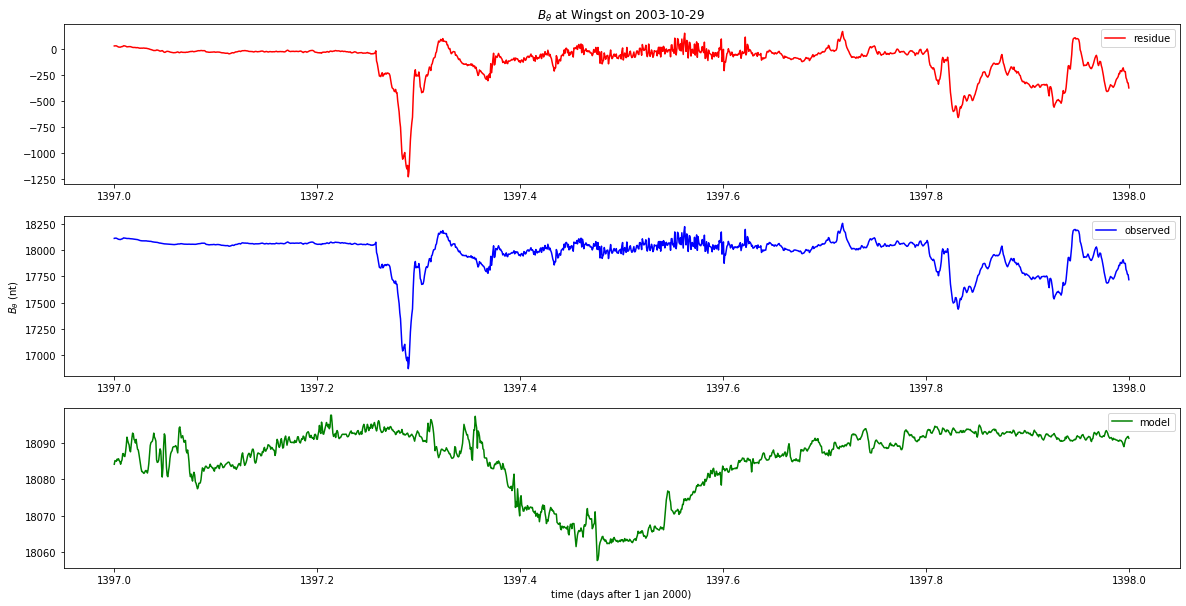

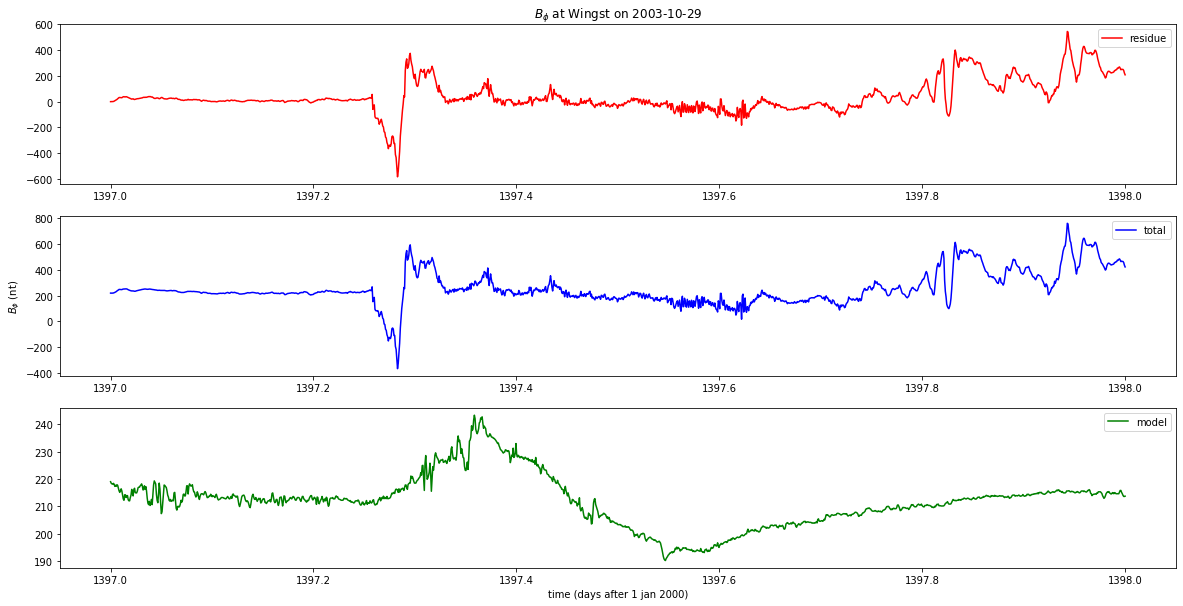

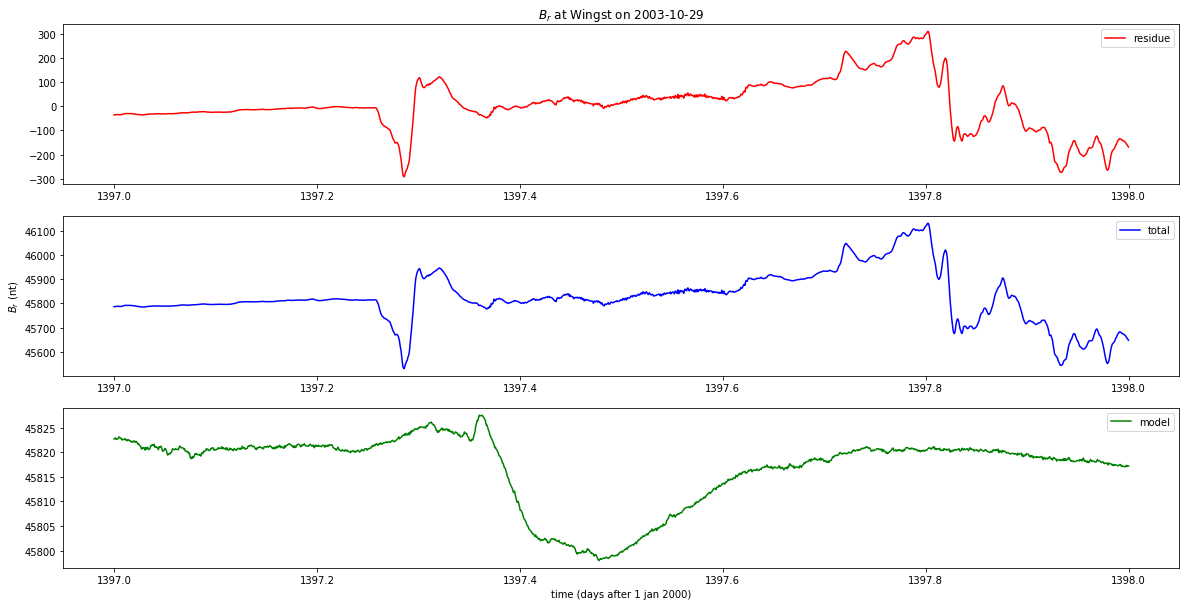

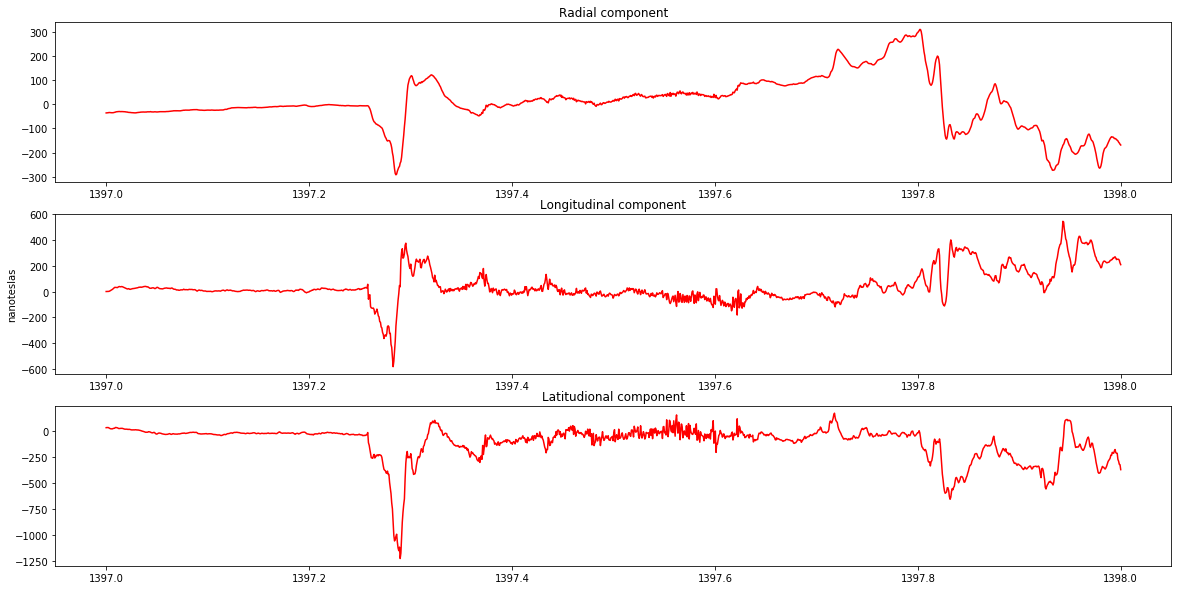

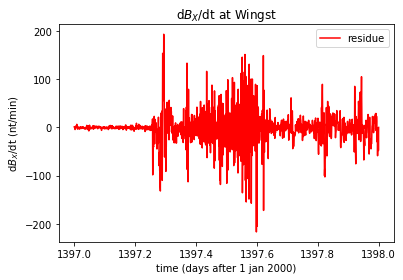

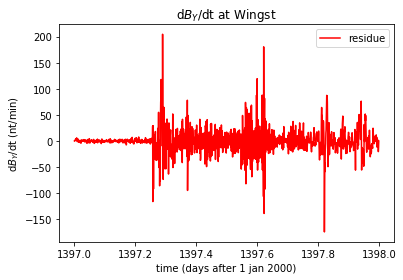

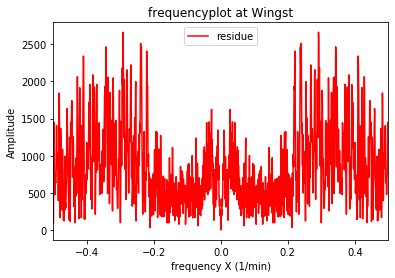

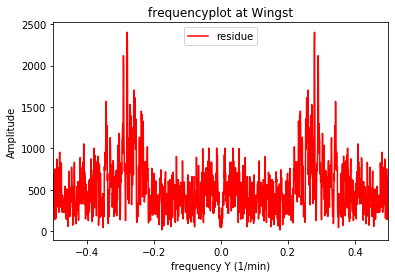

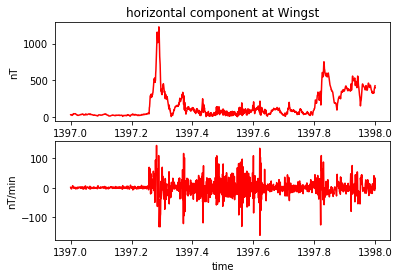

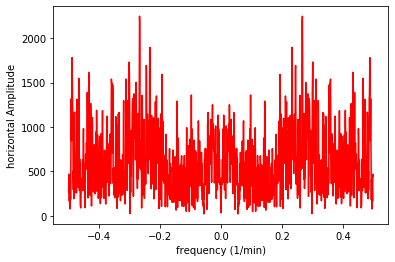

In [46]:
newplotspace('magnetic_data/29-10-2003/wng20031029dmin.min','magnetic_data/23-10-2003/wng20031023dmin.min',27,1)